# ЦПТ своими руками

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?



Я решила выбрать гамма-распределение,  ссылка на Википедию 
https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

Необходимые сведения:

плотность вероятности гамма-распределения
    \\[f_X(x) = \begin{cases}
        x^{k-1} \frac{e^{-x/\theta}}{\theta^k \Gamma(k)}, \: x \geqslant 0  \\
        0, \: x < 0
    \end{cases} \\]
    
   матожидание и дисперсия равны соответственно
    \\[ E[X] = k \theta \\]
    \\[ D[X] = k \theta^2 \\]
В Python параметр $\theta$ принимается равным 1 и плотность принимает вид
    \\[f(x,a)=\frac{x^{a-1} \cdot e^{-x}}{\Gamma(a)},    x  \geqslant 0,  a>0 . \\] 
    
    

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import gamma
%matplotlib inline

In [4]:
#зададим параметр распределения
a = 2

#наше распределение
g_dist = gamma(a)

#сгенерируем выборку объёма 1000
g_sample = gamma.rvs(a, size=1000)


Text(0.5,1,u'Gamma')

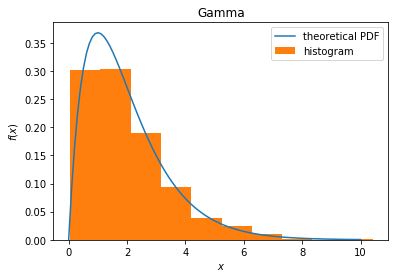

In [5]:
#построим теоретическую плотность распределения
x = np.linspace(0,10,100)
pdf = g_dist.pdf(x)
plt.plot(x, pdf, label='theoretical PDF')

#построим гистограмму по выборке
plt.hist(g_sample, normed=True, label = 'histogram')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')
plt.title('Gamma')

Будем генерировать 1000 выборок объема n, в каждой выборке считать выборочное среднее, потом построим гистограмму их распределения (их - выборочных средних). Предварительно посчитаем матожидание и среднеквадратическое отклонение для того нормального распределения, которое, согласно ЦПТ, должно аппроксимировать распределение наших выборочных средних.
Выполним для n = 5, 10, 50


In [6]:
# зададим n
n = 5

In [7]:
# матожидание и дисперсия гамма-распределения равны параметру распределения а
# посчитаем для  текущего n параметры mu  и sigma аппроксимирующего нормального распределения
mu = a
sigma = math.sqrt(a/n)

print n, mu, sigma

5 2 0.0


In [8]:
# генерируем 1000 выборок объема n и в каждой выборке считаем выборочное среднее, записываем его

#будущий массив выборочных средних
mean = np.zeros(1000)   

for i in range(999):
    # выборка длины n
    n_sample = gamma.rvs(a, size=n)
    # сделаем из нее np.array
    n_sample = np.array(n_sample)
    mean[i] = n_sample.sum() / n
    
    

In [9]:
# поскольку мы ожидаем, что будем смотреть на плотность нормального распределения, то поменяем область определения
x_n = np.linspace(0,4,100)

D:\Programs\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1649: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Text(0.5,1,u'n = 5')

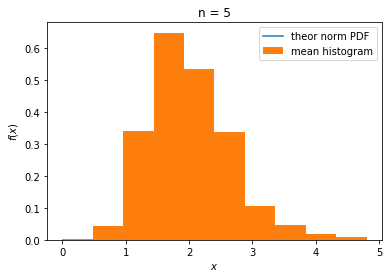

In [10]:
# зададим аппроксимирующее нормальное распределение, построим график плотности
norm_rv = sts.norm(loc=mu, scale=sigma)
pdf = norm_rv.pdf(x_n)
plt.plot(x_n, pdf, label='theor norm PDF')

# построим гистограмму выборочных средних
plt.hist(mean, normed=True, label = 'mean histogram')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')
plt.title('n = 5')

Отлично! Повторяем для n = 10

Text(0.5,1,u'n = 10')

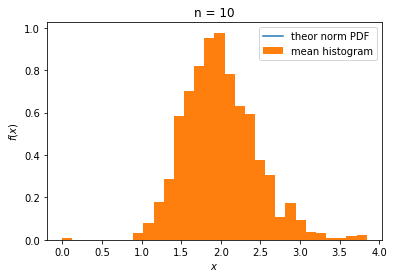

In [11]:
# зададим n
n = 10

# поскольку мы ожидаем, что будем смотреть на плотность нормального распределения, то поменяем область определения
x_n = np.linspace(0,4,100)

# матожидание и дисперсия гамма-распределения равны параметру распределения а
# посчитаем для  текущего n параметры mu  и sigma аппроксимирующего нормального распределения
mu = a
sigma = math.sqrt(a/n)

# генерируем 1000 выборок объема n и в каждой выборке считаем выборочное среднее, записываем его

#будущий массив выборочных средних
mean = np.zeros(1000)   

for i in range(999):
    # выборка длины n
    n_sample = gamma.rvs(a, size=n)
    # сделаем из нее np.array
    n_sample = np.array(n_sample)
    mean[i] = n_sample.sum() / n

# зададим аппроксимирующее нормальное распределение, построим график плотности
norm_rv = sts.norm(loc=mu, scale=sigma)
pdf = norm_rv.pdf(x_n)
plt.plot(x_n, pdf, label='theor norm PDF')

# построим гистограмму выборочных средних
plt.hist(mean, bins = 30, normed=True, label = 'mean histogram')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')
plt.title('n = 10')

Eщё лучше! Повторим для n = 50

Text(0.5,1,u'n = 50')

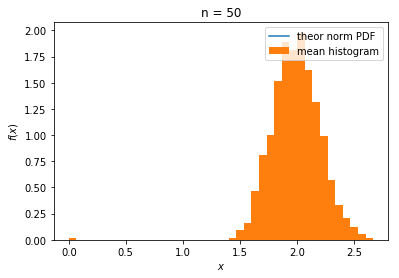

In [12]:
# зададим n
n = 50

# поскольку мы ожидаем, что будем смотреть на плотность нормального распределения, то поменяем область определения
x_n = np.linspace(1,3,100)

# матожидание и дисперсия гамма-распределения равны параметру распределения а
# посчитаем для  текущего n параметры mu  и sigma аппроксимирующего нормального распределения
mu = a
sigma = math.sqrt(a/n)

# генерируем 1000 выборок объема n и в каждой выборке считаем выборочное среднее, записываем его

#будущий массив выборочных средних
mean = np.zeros(1000)   

for i in range(999):
    # выборка длины n
    n_sample = gamma.rvs(a, size=n)
    # сделаем из нее np.array
    n_sample = np.array(n_sample)
    mean[i] = n_sample.sum() / n

# зададим аппроксимирующее нормальное распределение, построим график плотности
norm_rv = sts.norm(loc=mu, scale=sigma)
pdf = norm_rv.pdf(x_n)
plt.plot(x_n, pdf, label='theor norm PDF')

# построим гистограмму выборочных средних
plt.hist(mean, bins = 40, normed=True, label = 'mean histogram')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')
plt.title('n = 50')

Поскольку уж очень интересно, посмотрим на точность при n = 200

Text(0.5,1,u'n = 200')

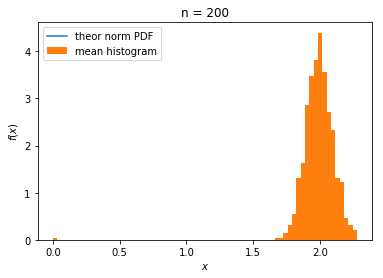

In [13]:
# зададим n
n = 200

# поскольку мы ожидаем, что будем смотреть на плотность нормального распределения, то поменяем область определения
x_n = np.linspace(1.5, 2.5, 100)

# матожидание и дисперсия гамма-распределения равны параметру распределения а
# посчитаем для  текущего n параметры mu  и sigma аппроксимирующего нормального распределения
mu = a
sigma = math.sqrt(a/n)

# генерируем 1000 выборок объема n и в каждой выборке считаем выборочное среднее, записываем его

#будущий массив выборочных средних
mean = np.zeros(1000)   

for i in range(999):
    # выборка длины n
    n_sample = gamma.rvs(a, size=n)
    # сделаем из нее np.array
    n_sample = np.array(n_sample)
    mean[i] = n_sample.sum() / n

# зададим аппроксимирующее нормальное распределение, построим график плотности
norm_rv = sts.norm(loc=mu, scale=sigma)
pdf = norm_rv.pdf(x_n)
plt.plot(x_n, pdf, label='theor norm PDF')

# построим гистограмму выборочных средних
plt.hist(mean, bins = 70, normed=True, label = 'mean histogram')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.title('n = 200')

Итого, вполне можем сделать вывод о том,  что ЦПТ работает и точность ее аппроксимации улучшается с ростом n. Ура!